# Predicting Credit Risk
**Supervised Machine Learning**

## Objective 
* To build a machine learning model that attempts to predict whether a loan from LendingClub will become high risk or not.

## Background
LendingClub is a peer-to-peer lending services company that allows individual investors to partially fund personal loans as well as buy and sell notes backing the loans on a secondary market. LendingClub offers their previous data through an API.
Task was to use this data to create machine learning models to classify the risk level of given loans. Specifically, would be comparing the Logistic Regression model and Random Forest Classifier.
___________________________________________________________________________________________________
## Dowloaded the latest version of datasets from [https://resources.lendingclub.com](https://resources.lendingclub.com)
#### Retrieved and prepared the data using [GenerateData.ipynb](Resources/Generator/GenerateData.ipynb)

GenerateData.ipynb does the following

* Reads the csv files that has been dowloaded from LendingClub.  

* Cleans the data and creates two CSVs that have been undersampled to give an evennumber of high risk and low risk loans.
   
    * 2019loans.csv  
    * 2020Q1loans.csv

In the original dataset, only 2.2% of loans are categorized as high risk. To get a truly accurate model, special techniques need to be used on imbalanced data. Undersampling is one of those techniques.

```python
low_risk_rows.sample(n=len(high_risk_rows), random_state=42)
```
    
Note : The newer version of csv's are slightly different compared to older version that was already available in the folder.

## In this Notebook ('Credit Risk Evaluator.ipynb')
* We are using an entire year's worth of data (2019) to predict the credit risk of loans from the first quarter of the next year (2020).

## Logistic regression Vs. Random Forests Classifier

Both the models are popular in machine learning. They are both efficient in generating reliable models for predictive modelling.

* Logistic regression is less complex, and less prone to over-fitting. 
* It does not really have any critical parameters to tune.
* It performs best with scaled data.  
<br />

* Random Forest uses Decision trees that can be scaled to be complex, and hence more liable to over-fit. Pruning is applied to avoid this.
* Although default parameters may work fine, Random Forests work best when they are tuned by applying parametes.
* Random Forsests perfoms well with unscaled data. 

When creating a predictive model, both the techniques should be tried and the best performing model should be used.

## A prediction as to which model will perform better before I created, fit, and scored the models. 
I predict Logistic regression will perform better because it works best for binany classification problems. The data in question has binary output belonging to one class or the other (High Risk, Low Risk).  
However, there are a number of categorical and explanatory variables in the dataset that might make Random Forest a better predictor. 
I still stick with Logical Regression.

**LET's FIND OUT**

Steps :
1. Converted categorical data to numeric and separated target feature for training data and testing data
2. Encoded target values using class sklearn.preprocessing.LabelEncoder
3. Added missing dummy variables to testing set
4. Trained the Logistic Regression model on the unscaled data and printed the model score
    * Adjusted hyperparameters on LR model on unscaled data to see if the score improves .
        * Tried a few combinations to tune
        * It did improve the Testing Data Score by 5%
        * Takes longer execution time each time a parameter/parameters is/are changed
6. Trained a Random Forest Classifier model on unscaled data and printed the model score  
    * Adjusted hyperparameters to see if the score improves .  
    To choose which hyperparameters to adjust, we could visualize with validation_curve, or conduct Exhaustive Grid Search. 
     * Used validation_curve and test the parameters 'n_estimators', 'max_depth', 'min_samples_split' by giving them a range of values.       
     * Adjusted the Hyperparameters on RF Classifiers on unscaled data 
        * Tried a few combinations to tune
        * It did NOT improve the Testing Data Score 
        * Takes longer execution time each time a parameter/parameters is/are changed
## Results
Unlike my prediction, The Random Forest Classifier performed far better then the logistic regression model on unscaled data.   
2020 First Quarter score was : **0.491332** for Logistic regression model.  
Random forest 2020 First Quarter score was : **0.683609** 

## Revisit the Preprocessing: Scale the data  

 * I predict that scaling data will considerably improve logistic regression model and it will outperform Random Forest Model. 
 StandardScaler makes field values compareable by removing the mean and by scaling each feature/variable to unit variance.
 * We know that Random Forst Model is built on decision trees and ensemble methods that do not require feature scaling as they are not sensitive to the the variance in the data. Hence, we might not see significant improvement in Random Forest model.  

#### Scaled Training and Testging sets using StandardScaler().fit_transform()  

#### Trained the Logistic Regression model on the scaled data and printed the model score  

* Logistic regression model improved considerably after scaling the data.

#### Trained Random Forest Classifier model on the scaled data and printed the model score 

* Random Forest's performance did not improve with scaled data.
* Logistice Regression outperformed Random Forest Classifier.  

#### Included the following for Both Models:

* Confusion matrices and classification reports to give us information about precision and recall in addition to accuracy. 

* Added Feature importance in descending order to tell us which feature had the most influence in creating an accurate model.

## Conclusions  

* After scaling the data, Logistic Regression outperformed Random Forest Classifier.  
    * 2020 First Quarter score for Logistic Regression : **0.754268** 
    * 2020 First Quarter score for Random Forest       : **0.613607**  
    
#### LogisticRegression Model Performed well on this Data and we can conclude that it is the right Model to predict whether a loan from LendingClub will become high risk or not.

In [124]:
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# To choose which hyperparameters to adjust, we could visualize with validation_curve
from yellowbrick.model_selection import validation_curve

# or conduct Exhaustive Grid Search.
# from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [125]:
# !pip install yellowbrick

In [126]:
train_df = pd.read_csv(Path('Resources/2019loans.csv'))
test_df = pd.read_csv(Path('Resources/2020Q1loans.csv'))

In [127]:
# Convert categorical data to numeric and separate target feature for training data
# separate target feature for training data
X_train = train_df.drop('target', axis=1)
y_train = train_df['target']

# Convert categorical data to numeric
X_train = pd.get_dummies(X_train)

# encoding target values using class sklearn.preprocessing.LabelEncoder
y_train = LabelEncoder().fit_transform(y_train)

In [128]:
# print(X_train)
# print(y_train)

In [129]:
# Convert categorical data to numeric and separate target feature for testing data

# separate target feature for testing data
X_test = test_df.drop('target', axis=1)
y_test = test_df['target']

# Convert categorical data to numeric
X_test = pd.get_dummies(X_test)

# encoding target values using class sklearn.preprocessing.LabelEncoder
y_test = LabelEncoder().fit_transform(y_test)

In [130]:
# print(X_test)
# print(y_test)

In [131]:
# add missing dummy variables to testing set
# Compare fields from train to test. If there is field in traning dataset that is not in testing set , add it to X_test
for colmn in X_train.columns:
    if colmn not in X_test.columns:
        X_test[colmn] = 0
     

I predict Logistic regression will perform better because it works best for binany classification problems. The data in question has binary out put belonging to one class or the other (Low Risk or High Risk (1,0))
However, there are a number of categorical and explanatory variables in the dataset that might make Random Forest a better predictor. I still stick with Logical Regression.  
#### Let's Find Out

## Train the Logistic Regression model on the unscaled data and print the model score

In [132]:
# Train the Logistic Regression model on the unscaled data
model_unscaled = LogisticRegression(max_iter=10000)
model_unscaled.fit(X_train, y_train)

LR_US_Tr_scr = model_unscaled.score(X_train, y_train)
LR_US_Tst_scr = model_unscaled.score(X_test, y_test)
# Print the model score
print(f"Training data scrore : {LR_US_Tr_scr}")
print(f"Testing data scrore : {LR_US_Tst_scr}")



Training data scrore : 0.7245338264755741
Testing data scrore : 0.44102968216443394


Adjusting hyperparameters to see if the score improves .

In [133]:

#model_unscaled = LogisticRegression(solver="saga", max_iter=10000, C=3.2, penalty='l2')
model_unscaled = LogisticRegression(solver="sag", max_iter=10000, C=2.5, penalty='l2')
model_unscaled.fit(X_train, y_train)

LR_US_Tr_Par_scr = model_unscaled.score(X_train, y_train)
LR_US_Tst_Par_scr = model_unscaled.score(X_test, y_test)

# Print the model score
print(f"Training data scrore : {LR_US_Tr_Par_scr}")
print(f"Testing data scrore : {LR_US_Tst_Par_scr}")

Training data scrore : 0.6311450146401603
Testing data scrore : 0.4913317572892041


In [134]:
print(LR_US_Tst_Par_scr - LR_US_Tst_scr)

0.05030207512477014


#### Adjusting the Hyperparameters on LR model on unscaled data 
* Tried a few combinations to tune
* It did improve the Testing Data Score by 5%
* Takes longer execution time each time a parameter/parameters is/are changed


## Train a Random Forest Classifier model on unscaled data and print the model score


In [135]:
# Train the Random Forest Classifier model on unscaled data
model_unscaledRF = RandomForestClassifier()
model_unscaledRF.fit(X_train, y_train)

# Print the model score
RF_US_Tr_scr  = model_unscaledRF.score(X_train, y_train)
RF_US_Tst_scr = model_unscaledRF.score(X_test, y_test)


print(f"Training data scrore : {RF_US_Tr_scr}")
print(f"Testing data scrore : {RF_US_Tst_scr}")

Training data scrore : 1.0
Testing data scrore : 0.6767796164959285


Adjusting hyperparameters to see if the score improves .  
To choose which hyperparameters to adjust, we could visualize with validation_curve, or conduct Exhaustive Grid Search. Here we are using validation_curve and test the parameters 'n_estimators', 'max_depth', 'min_samples_split'by giving them a range of values. 

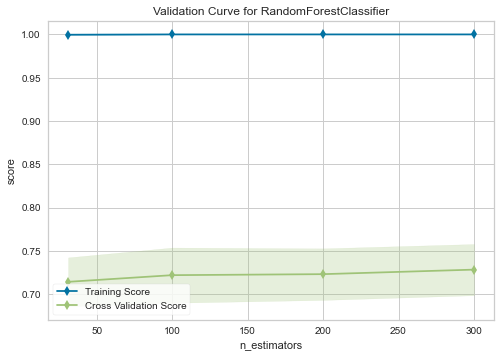

ValidationCurve(ax=<AxesSubplot:title={'center':'Validation Curve for RandomForestClassifier'}, xlabel='n_estimators', ylabel='score'>,
                cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                param_name='n_estimators',
                param_range=array([ 31, 100, 200, 300]), scoring='accuracy')


In [136]:
print(validation_curve(model_unscaledRF, X_train, y_train, param_name="n_estimators", n_jobs=-1,
      param_range = [31,100,200,300], cv=3, scoring="accuracy"))

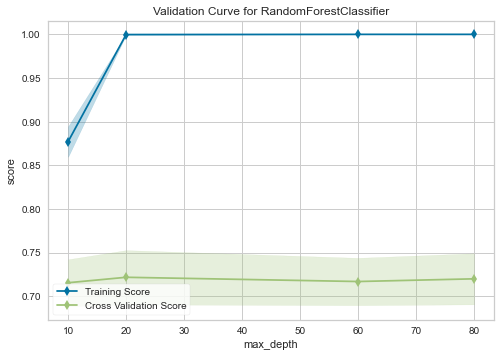

ValidationCurve(ax=<AxesSubplot:title={'center':'Validation Curve for RandomForestClassifier'}, xlabel='max_depth', ylabel='score'>,
                cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                param_name='max_depth', param_range=array([10, 20, 60, 80]),
                scoring='accuracy')


In [137]:
print(validation_curve(model_unscaledRF, X_train, y_train, param_name="max_depth", n_jobs=-1,
      param_range = [10,20,60,80], cv=3, scoring="accuracy"))

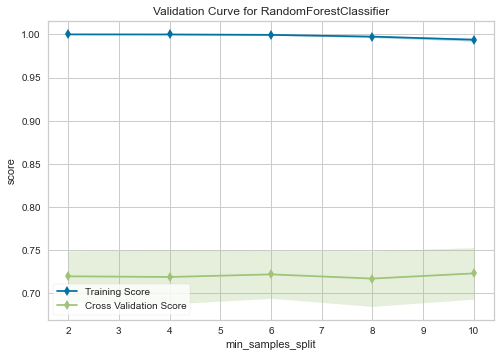

ValidationCurve(ax=<AxesSubplot:title={'center':'Validation Curve for RandomForestClassifier'}, xlabel='min_samples_split', ylabel='score'>,
                cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                param_name='min_samples_split',
                param_range=array([ 2,  4,  6,  8, 10]), scoring='accuracy')


In [138]:
print(validation_curve(model_unscaledRF, X_train, y_train, param_name="min_samples_split", n_jobs=-1,
      param_range = [2,4,6,8,10], cv=3, scoring="accuracy"))

In [139]:
# Train the Random Forest Classifier model on unscaled data using best parameters from validation_curve.
model_unscaledRF = RandomForestClassifier(n_estimators=300, max_depth=30, min_samples_split=5)
model_unscaledRF.fit(X_train, y_train)



# Print the model score
RF_US_Tr_Par_scr  = model_unscaledRF.score(X_train, y_train)
RF_US_Tst_Par_scr = model_unscaledRF.score(X_test, y_test)


print(f"Training data scrore : {RF_US_Tr_Par_scr}")
print(f"Testing data scrore : {RF_US_Tst_Par_scr}")

Training data scrore : 1.0
Testing data scrore : 0.6685053848174416


In [140]:

model_unscaledRF = RandomForestClassifier(n_estimators=31)
# model_unscaledRF = RandomForestClassifier(max_features=0.4, n_estimators = 31, min_samples_leaf=64)
#model_unscaledRF = RandomForestClassifier(n_estimators = 31, oob_score = True,n_jobs = -1,random_state =1)
model_unscaledRF.fit(X_train, y_train)

# Print the model score
RF_US_Tr_Par_scr  = model_unscaledRF.score(X_train, y_train)
RF_US_Tst_Par_scr = model_unscaledRF.score(X_test, y_test)


print(f"Training data scrore : {RF_US_Tr_Par_scr}")
print(f"Testing data scrore : {RF_US_Tst_Par_scr}")

Training data scrore : 0.9995376791493297
Testing data scrore : 0.677698975571316


**Tried a few parameters but the best score was for n_estimators=31**

In [141]:
print(RF_US_Tst_Par_scr - RF_US_Tst_scr)

0.000919359075387427


#### Adjusting the Hyperparameters on RF Classifiers  on unscaled data 
* Tried a few combinations to tune
* It did NOT improve the Testing Data Score 
* Takes longer execution time each time a parameter/parameters is/are changed

## Results
Unlike my prediction, The Random Forest Classifier performed far better then the logistic regression model.   
2020 First Quarter score was : **0.4913317572892041** for Logistic regression model.  
Random forest 2020 First Quarter score was : **0.677698975571316**

In [142]:
if (LR_US_Tst_Par_scr >= LR_US_Tst_scr):
    LR_US_Tst_scr = LR_US_Tst_Par_scr
if (RF_US_Tst_Par_scr >= RF_US_Tst_scr):
    RF_US_Tst_scr = RF_US_Tst_Par_scr    
if (LR_US_Tr_Par_scr >= LR_US_Tr_scr):
    LR_US_Tr_scr = LR_US_Tr_Par_scr
if (RF_US_Tr_Par_scr >= RF_US_Tr_scr):
    RF_US_Tr_scr = RF_US_Tr_Par_scr        

# pd.DataFrame(data=[[LR_US_Tst_scr,RF_US_Tst_scr]], 
# columns=['Logistic Reg UnScaled', 'Random Forest UnScaled'])

final_results_us = pd.DataFrame(
    data={'Dataset':['2019loans(Training)', '2020Q1loans(Testing)'], \
    'Logistic Reg UnScaled':[LR_US_Tr_scr,LR_US_Tst_scr],\
    'Random Forest UnScaled':[RF_US_Tr_scr,RF_US_Tst_scr]
    })
final_results_us

,Dataset,Logistic Reg UnScaled,Random Forest UnScaled
0,2019loans(Training),0.724534,1.000000
1,2020Q1loans(Testing),0.491332,0.677699


# Revisit the Preprocessing: Scale the data
 * I predict that scaling data will considerably improve logistic regression model and it will outperform Random Forest Model. 
 StandardScaler makes field values compareable by removing the mean and by scaling each feature/variable to unit variance.
 * We know that Random Forst Model is built on decision trees and ensemble methods that do not require feature scaling as they are not sensitive to the the variance in the data. Hence, we might not see significant improvement in Random Forest model.


In [143]:
# Data before scaling
#X_train

In [144]:
X_train_scaled = StandardScaler().fit_transform(X_train)
# display(X_train_scaled)

X_test_scaled = StandardScaler().fit_transform(X_test)
# display(X_test_scaled)

In [145]:
# Data after scaling
#X_train_scaled

## Train the Logistic Regression model on the scaled data and print the model score


In [146]:
model_scaledLR = LogisticRegression(solver="sag", max_iter=10000, C=2.5, penalty='l2')
model_scaledLR.fit(X_train_scaled, y_train)

# Print the model score
LR_S_Tr_scr  = model_scaledLR.score(X_train_scaled, y_train)
LR_S_Tst_scr = model_scaledLR.score(X_test_scaled, y_test)


print(f"Training data scrore : {LR_S_Tr_scr}")
print(f"Testing data scrore : {LR_S_Tst_scr}")

# model_scaledLR.score(X_test_scaled, y_test)

Training data scrore : 0.7320080135614117
Testing data scrore : 0.7542684528500131


Predictions

In [147]:
predictions = model_scaledLR.predict(X_test_scaled)
print(f"First 16 predictions:   {predictions[:16]}")
print(f"First 16 actual labels: {y_test[:16].tolist()}")

First 16 predictions:   [1 1 1 0 1 1 1 0 1 0 1 1 0 1 0 1]
First 16 actual labels: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


Confusion Matrix

In [148]:
y_true = y_test
y_pred = model_scaledLR.predict(X_test_scaled)
confusion_matrix(y_true, y_pred)


array([[2896,  911],
       [ 960, 2847]], dtype=int64)

Accuracy of the model

In [149]:
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
accuracy = (tp + tn) / (tp + fp + tn + fn)
print(f"Accuracy : {accuracy}")

Accuracy : 0.7542684528500131


Classification Report

In [150]:
print (classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.76      0.76      3807
           1       0.76      0.75      0.75      3807

    accuracy                           0.75      7614
   macro avg       0.75      0.75      0.75      7614
weighted avg       0.75      0.75      0.75      7614



In [151]:
importance = model_scaledLR.coef_[0]
important_features_list = []
for i in range(len(importance)):
    important_features_list.append((X_train.columns[i], importance[i]))
    
important_features_list = sorted(important_features_list, key = lambda x: x[1],reverse=True)    

#### Feature list in the order of importance displaying which feature had the most influence in creating an accurate model.


In [152]:
print ("Feature list in the order of importance")
print ("---------------------------------------")
for i in range(len(important_features_list)):
    print(f"{important_features_list[i][0]} : {important_features_list[i][1]}")

Feature list in the order of importance
---------------------------------------
total_rec_prncp : 1.001582183130972
last_pymnt_amnt : 0.8057175707589949
total_pymnt : 0.7032360352788826
total_pymnt_inv : 0.6901042863176523
loan_amnt : 0.5758783334714875
total_il_high_credit_limit : 0.28033486294819593
total_bc_limit : 0.2766244762935493
open_rv_24m : 0.08717045879372153
pct_tl_nvr_dlq : 0.08189219200413983
home_ownership_MORTGAGE : 0.07422563478249909
num_actv_bc_tl : 0.07324785183253732
mths_since_recent_inq : 0.07225911828797525
mo_sin_old_rev_tl_op : 0.07093739755890968
open_rv_12m : 0.07004586598831372
num_op_rev_tl : 0.06869126178504074
out_prncp_inv : 0.06655378471680651
out_prncp : 0.06515770937210319
num_bc_tl : 0.0642317292948756
open_il_12m : 0.053037674425693716
mo_sin_old_il_acct : 0.052914971180563604
hardship_flag_N : 0.050954326215048515
mo_sin_rcnt_rev_tl_op : 0.05084570082109454
revol_bal : 0.050820481089155434
open_il_24m : 0.04942461732836335
open_acc : 0.04571636511

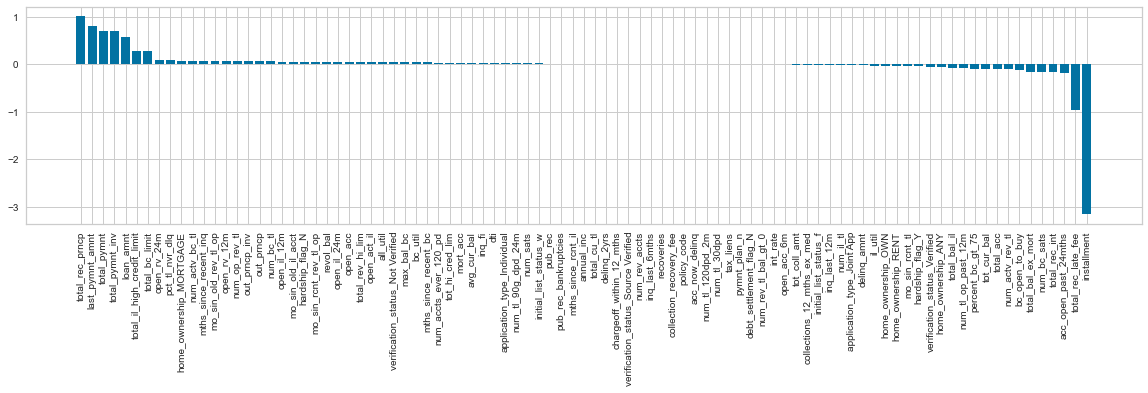

In [162]:

df = pd.DataFrame(important_features_list, columns =['Feature', 'Importance'])
plt.figure(figsize=(20,4))
plt.bar(df['Feature'], df['Importance'])
plt.xticks(rotation=90)
plt.show()

* **Logistic regression model improved considerably after scaling the data.**
* Checked accuray using Confusion Matrix

## Train a Random Forest Classifier model on the scaled data and print the model score

In [154]:
model_scaledRF = RandomForestClassifier(n_estimators=31)
model_scaledRF.fit(X_train_scaled, y_train)
# model_scaledRF.score(X_test_scaled, y_test)


# Print the model score
RF_S_Tr_scr  = model_scaledRF.score(X_train_scaled, y_train)
RF_S_Tst_scr = model_scaledRF.score(X_test_scaled, y_test)


print(f"Training data scrore : {RF_S_Tr_scr}")
print(f"Testing data scrore : {RF_S_Tst_scr}")

Training data scrore : 0.9996147326244413
Testing data scrore : 0.6058576306803257


* Random Forest has no positive effect with scaled data. It did Not improve.
* Logistice Regression outperformed random Forest Classifier.

Predictions

In [155]:
predictions = model_scaledRF.predict(X_test_scaled)
print(f"First 16 predictions:   {predictions[:16]}")
print(f"First 16 actual labels: {y_test[:16].tolist()}")

First 16 predictions:   [1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
First 16 actual labels: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


Confusion Matrix

In [156]:
y_true = y_test
y_pred = model_scaledRF.predict(X_test_scaled)
confusion_matrix(y_true, y_pred)

array([[3676,  131],
       [2870,  937]], dtype=int64)

Accuracy of the model

In [157]:
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
accuracy = (tp + tn) / (tp + fp + tn + fn)
print(f"Accuracy : {accuracy}")

Accuracy : 0.6058576306803257


Classification Report

In [158]:
print (classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.56      0.97      0.71      3807
           1       0.88      0.25      0.38      3807

    accuracy                           0.61      7614
   macro avg       0.72      0.61      0.55      7614
weighted avg       0.72      0.61      0.55      7614



In [159]:
features = model_scaledRF.feature_importances_
features_list = []
for i in range(len(features)):
    features_list.append((X_train.columns[i], features[i]))
    
features_list = sorted(features_list, key = lambda x: x[1],reverse=True)


#### Feature list in the order of importance displaying which feature had the most influence in creating an accurate model.


In [160]:
print ("Feature list in the order of importance")
print ("---------------------------------------")
for i in range(len(features_list)):
    print(f"{features_list[i][0]} : {features_list[i][1]}")


Feature list in the order of importance
---------------------------------------
last_pymnt_amnt : 0.10284938305058136
total_rec_prncp : 0.04269734697780811
out_prncp_inv : 0.03999049380206395
int_rate : 0.039438287491674225
out_prncp : 0.03490080758856274
installment : 0.030265928494745267
total_rec_int : 0.02776459484015255
total_pymnt_inv : 0.022842200555664726
mo_sin_old_rev_tl_op : 0.020932718217965943
total_pymnt : 0.02042140555074754
total_bc_limit : 0.01812181663535101
total_rec_late_fee : 0.018067130591427952
max_bal_bc : 0.017796046852749988
total_rev_hi_lim : 0.017698985569103702
mo_sin_old_il_acct : 0.01762160138991114
loan_amnt : 0.017337414269419666
bc_open_to_buy : 0.01723064505917148
dti : 0.016750349034014175
revol_bal : 0.016648785299269914
il_util : 0.016168865122594786
total_il_high_credit_limit : 0.015892330351025403
tot_hi_cred_lim : 0.015784003497733574
bc_util : 0.015393323005553667
annual_inc : 0.015241875598899168
avg_cur_bal : 0.015073458635096319
total_bal_ex

In [161]:
final_results = pd.DataFrame(
    data={'Dataset':['2019loans(Training)', '2020Q1loans(Testing)'], \
    'Logistic Reg UnScaled':[LR_US_Tr_scr,LR_US_Tst_scr],\
    'Random Forest UnScaled':[RF_US_Tr_scr,RF_US_Tst_scr],\
    'Logistic Reg Scaled':[LR_S_Tr_scr,LR_S_Tst_scr],\
    'Random Forest Scaled':[RF_S_Tr_scr,RF_S_Tst_scr]\
    })
final_results   

,Dataset,Logistic Reg UnScaled,Random Forest UnScaled,Logistic Reg Scaled,Random Forest Scaled
0,2019loans(Training),0.724534,1.000000,0.732008,0.999615
1,2020Q1loans(Testing),0.491332,0.677699,0.754268,0.605858


# Conclusions
* After scaling the data, Logistic Regression outperformed Random Forest Classifier. 
    * 2020 First Quarter score for Logistic Regression : **0.754268** 
    * 2020 First Quarter score for Random Forest       : **0.605858** 
    
#### LogisticRegression Model Performed well on this Data and we can conclude that it is the right Model to predict whether a loan from LendingClub will become high risk or not.    